A partir do código disponibilizado em 2-word-embeddings.ipynb:
* Fazer uma cópia do notebook para o seu drive.
* Plotar as palavras usando o modelo pre-treinado, ao invés do modelo que treinamos. Enviar apenas o plot do gráfico com vetores em 2D na tarefa.
* Gerar embeddings de frases. Escolher 10 frases do livro e fazer o plot das frases. Enviar o plot com os vetores em 2D.

# Modelo de embeddings pré-treinado

 Vamos usar o gensim para carregar o modelo, que é baseado no word2vec, treinado na Wikipedia em vetores de 100 dimensões.


In [1]:
from gensim.models import KeyedVectors
from huggingface_hub import hf_hub_download
model = KeyedVectors.load_word2vec_format(hf_hub_download(repo_id="Word2vec/wikipedia2vec_ptwiki_20180420_100d", filename="ptwiki_20180420_100d.txt"))

c:\Users\oknotok\Documents\computacao\tomorrow\modelos_de_linguagem_neurais\lain\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Carregando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.tokenize import WordPunctTokenizer

Carregando Dom Casmurro

In [3]:
domCasmurro = list(open('./domCasmurro.txt', 'r', encoding="utf-8"))
domCasmurro[0:10]

['Dom Casmurro\n',
 '\n',
 'CAPÍTULO PRIMEIRO\n',
 'DO TÍTULO\n',
 'Uma noite destas, vindo da cidade para o Engenho Novo, encontrei no trem da\n',
 'Central um rapaz aqui do bairro, que eu conheço de vista e de chapéu.\n',
 'Cumprimentou-me, sentou-se ao pé de mim, falou da Lua e dos ministros, e\n',
 'acabou recitando-me versos. A viagem era curta, e os versos pode ser que não\n',
 'fossem inteiramente maus. Sucedeu, porém, que, como eu estava cansado, fechei\n',
 'os olhos três ou quatro vezes; tanto bastou para que ele interrompesse a leitura e\n']

Tokenizando o texto

In [4]:
tokenizer = WordPunctTokenizer()
txt_tokenizado = [tokenizer.tokenize(linha.lower()) for linha in domCasmurro]
txt_tokenizado[0:10]

[['dom', 'casmurro'],
 [],
 ['capítulo', 'primeiro'],
 ['do', 'título'],
 ['uma',
  'noite',
  'destas',
  ',',
  'vindo',
  'da',
  'cidade',
  'para',
  'o',
  'engenho',
  'novo',
  ',',
  'encontrei',
  'no',
  'trem',
  'da'],
 ['central',
  'um',
  'rapaz',
  'aqui',
  'do',
  'bairro',
  ',',
  'que',
  'eu',
  'conheço',
  'de',
  'vista',
  'e',
  'de',
  'chapéu',
  '.'],
 ['cumprimentou',
  '-',
  'me',
  ',',
  'sentou',
  '-',
  'se',
  'ao',
  'pé',
  'de',
  'mim',
  ',',
  'falou',
  'da',
  'lua',
  'e',
  'dos',
  'ministros',
  ',',
  'e'],
 ['acabou',
  'recitando',
  '-',
  'me',
  'versos',
  '.',
  'a',
  'viagem',
  'era',
  'curta',
  ',',
  'e',
  'os',
  'versos',
  'pode',
  'ser',
  'que',
  'não'],
 ['fossem',
  'inteiramente',
  'maus',
  '.',
  'sucedeu',
  ',',
  'porém',
  ',',
  'que',
  ',',
  'como',
  'eu',
  'estava',
  'cansado',
  ',',
  'fechei'],
 ['os',
  'olhos',
  'três',
  'ou',
  'quatro',
  'vezes',
  ';',
  'tanto',
  'bastou',
  'para'

In [5]:
# Limpando o texto tokenizado
txt_tokenizado = [[token for token in linha if token.isalpha()] for linha in txt_tokenizado]
txt_tokenizado[0:10]

[['dom', 'casmurro'],
 [],
 ['capítulo', 'primeiro'],
 ['do', 'título'],
 ['uma',
  'noite',
  'destas',
  'vindo',
  'da',
  'cidade',
  'para',
  'o',
  'engenho',
  'novo',
  'encontrei',
  'no',
  'trem',
  'da'],
 ['central',
  'um',
  'rapaz',
  'aqui',
  'do',
  'bairro',
  'que',
  'eu',
  'conheço',
  'de',
  'vista',
  'e',
  'de',
  'chapéu'],
 ['cumprimentou',
  'me',
  'sentou',
  'se',
  'ao',
  'pé',
  'de',
  'mim',
  'falou',
  'da',
  'lua',
  'e',
  'dos',
  'ministros',
  'e'],
 ['acabou',
  'recitando',
  'me',
  'versos',
  'a',
  'viagem',
  'era',
  'curta',
  'e',
  'os',
  'versos',
  'pode',
  'ser',
  'que',
  'não'],
 ['fossem',
  'inteiramente',
  'maus',
  'sucedeu',
  'porém',
  'que',
  'como',
  'eu',
  'estava',
  'cansado',
  'fechei'],
 ['os',
  'olhos',
  'três',
  'ou',
  'quatro',
  'vezes',
  'tanto',
  'bastou',
  'para',
  'que',
  'ele',
  'interrompesse',
  'a',
  'leitura',
  'e']]

In [6]:
palavras = []

for sublista in txt_tokenizado:
    for palavra in sublista:
        if palavra not in palavras:
            palavras.append(palavra)

palavras = sorted(palavras,
               key=lambda palavra: len(palavras),
               reverse=True)[:1000]

In [7]:
palavras[0:10]

['dom',
 'casmurro',
 'capítulo',
 'primeiro',
 'do',
 'título',
 'uma',
 'noite',
 'destas',
 'vindo']

In [8]:
# vetores_palavras = np.array([model.get_vector(palavra) for palavra in palavras])

vetores_palavras = np.array([
    model.get_vector(palavra) if palavra in model else np.ones(model.vector_size)
    for palavra in palavras
])

In [9]:
vetores_palavras.shape

(1000, 100)

In [10]:
def tsne_plot(palavras, vectors):

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    valores = tsne_model.fit_transform(vectors)
    print(valores.shape)

    x = []
    y = []
    for valor in valores:
        x.append(valor[0])
        y.append(valor[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(palavras[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title('Plot 2D das palavras de Dom Casmurro')
    plt.show()

Plotagem das palavras

c:\Users\oknotok\Documents\computacao\tomorrow\modelos_de_linguagem_neurais\lain\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(1000, 2)


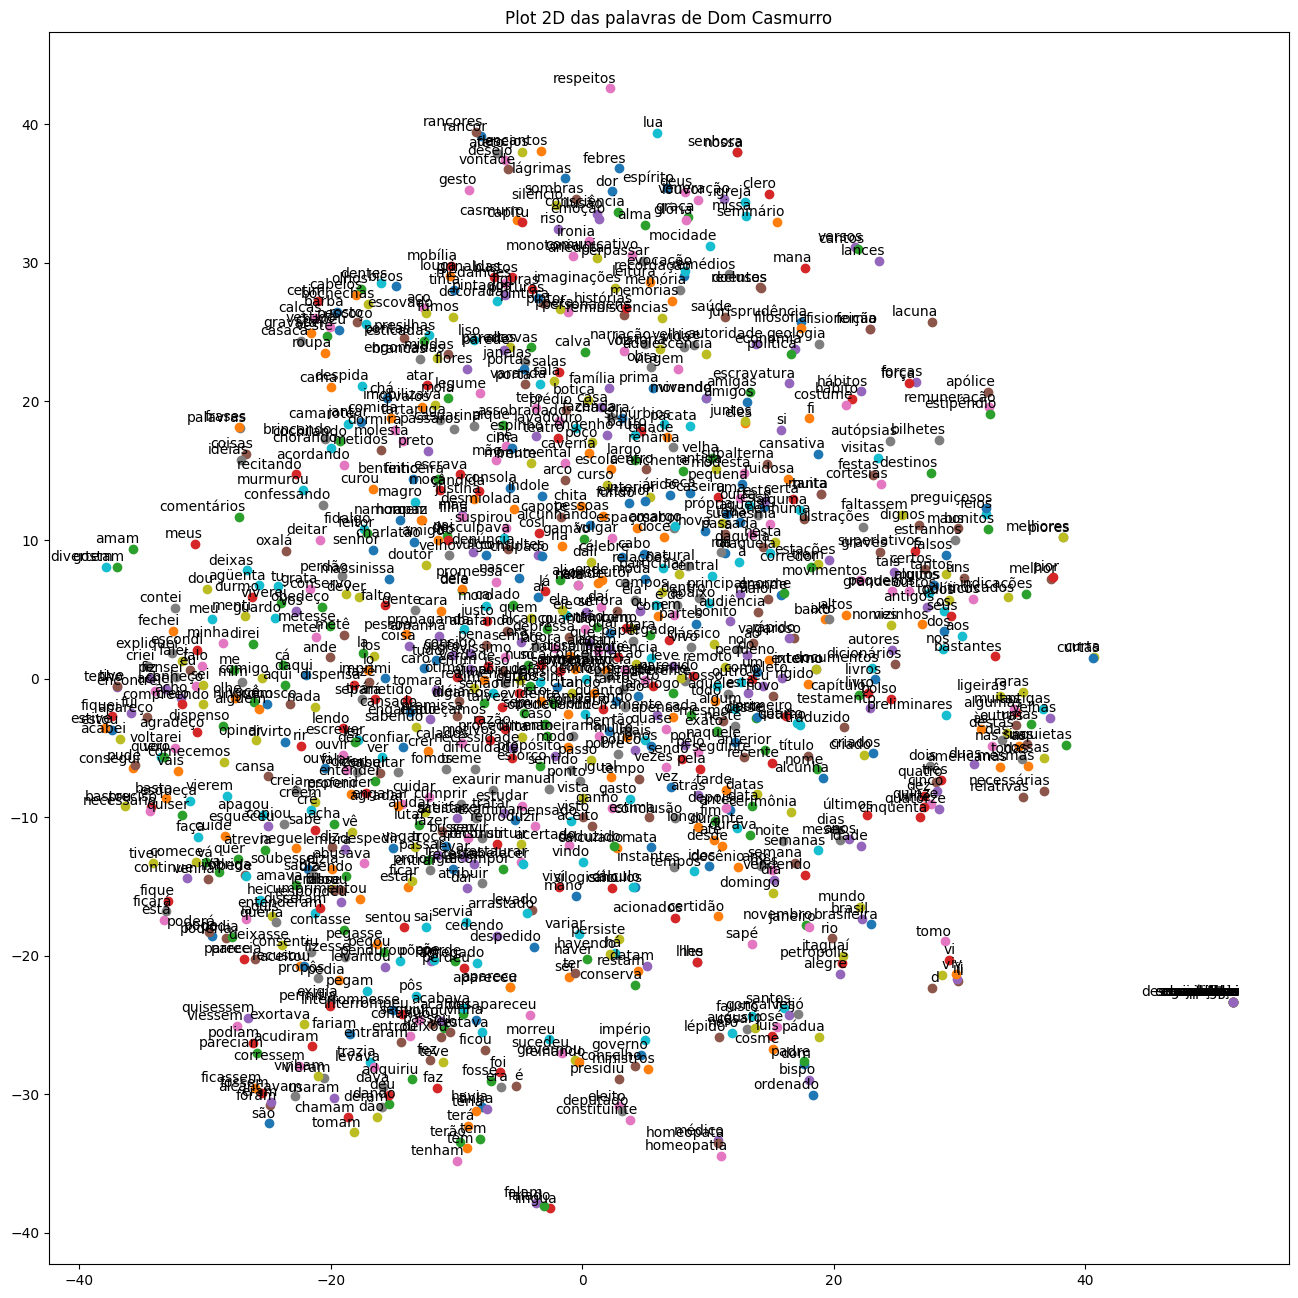

In [11]:
tsne_plot(palavras, vetores_palavras)

Selecionando 10 frases do livro

In [12]:
# frases = []

# for linha in domCasmurro:
#         if linha.count('— '):
#             frases.append(linha.replace('\n', '').replace('— ', ''))
            
# frases = np.random.choice(frases, 10)

In [13]:
frases = ["São bondades, retorquiu lisonjeado.",
        "Você ainda se lembra da roça, Tomás?",
        "Pois que outra coisa, Bentinho?",
        "Prepara-te, Bentinho; tu podes vir a ser protonotário apostólico.",
        "São favores de pessoas dignas",
        "pedia a minha mãe que me não fizesse padre",
        "Olhe a presilha, abotoe a presilha.",
        "Papai não faz diferença dos últimos retratos",
        "disse-me ele.",
        "Nem você?"]

In [14]:
frases

['São bondades, retorquiu lisonjeado.',
 'Você ainda se lembra da roça, Tomás?',
 'Pois que outra coisa, Bentinho?',
 'Prepara-te, Bentinho; tu podes vir a ser protonotário apostólico.',
 'São favores de pessoas dignas',
 'pedia a minha mãe que me não fizesse padre',
 'Olhe a presilha, abotoe a presilha.',
 'Papai não faz diferença dos últimos retratos',
 'disse-me ele.',
 'Nem você?']

Calculando os embeddings das frases

In [15]:
# Calculando os embeddings das frases
frases_tokenizadas = [tokenizer.tokenize(frase.lower()) for frase in frases]

In [16]:
frases_tokenizadas

[['são', 'bondades', ',', 'retorquiu', 'lisonjeado', '.'],
 ['você', 'ainda', 'se', 'lembra', 'da', 'roça', ',', 'tomás', '?'],
 ['pois', 'que', 'outra', 'coisa', ',', 'bentinho', '?'],
 ['prepara',
  '-',
  'te',
  ',',
  'bentinho',
  ';',
  'tu',
  'podes',
  'vir',
  'a',
  'ser',
  'protonotário',
  'apostólico',
  '.'],
 ['são', 'favores', 'de', 'pessoas', 'dignas'],
 ['pedia', 'a', 'minha', 'mãe', 'que', 'me', 'não', 'fizesse', 'padre'],
 ['olhe', 'a', 'presilha', ',', 'abotoe', 'a', 'presilha', '.'],
 ['papai', 'não', 'faz', 'diferença', 'dos', 'últimos', 'retratos'],
 ['disse', '-', 'me', 'ele', '.'],
 ['nem', 'você', '?']]

In [17]:
vetores_frases = np.array([np.mean([model.get_vector(token) for token in frase if token in model], axis=0) for frase in frases_tokenizadas])

In [18]:
vetores_frases.shape

(10, 100)

Plotagem das frases

In [19]:
def frases_tsne_plot(frases, vetores_frases):

    tsne_model = TSNE(perplexity=9, n_components=2, init='pca', n_iter=2500, random_state=23)
    valores = tsne_model.fit_transform(vetores_frases)
    print(valores.shape)

    x = []
    y = []
    for valor in valores:
        x.append(valor[0])
        y.append(valor[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(frases[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title('Plot das 10 frases de Dom Casmurro')
    plt.show()

c:\Users\oknotok\Documents\computacao\tomorrow\modelos_de_linguagem_neurais\lain\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(10, 2)


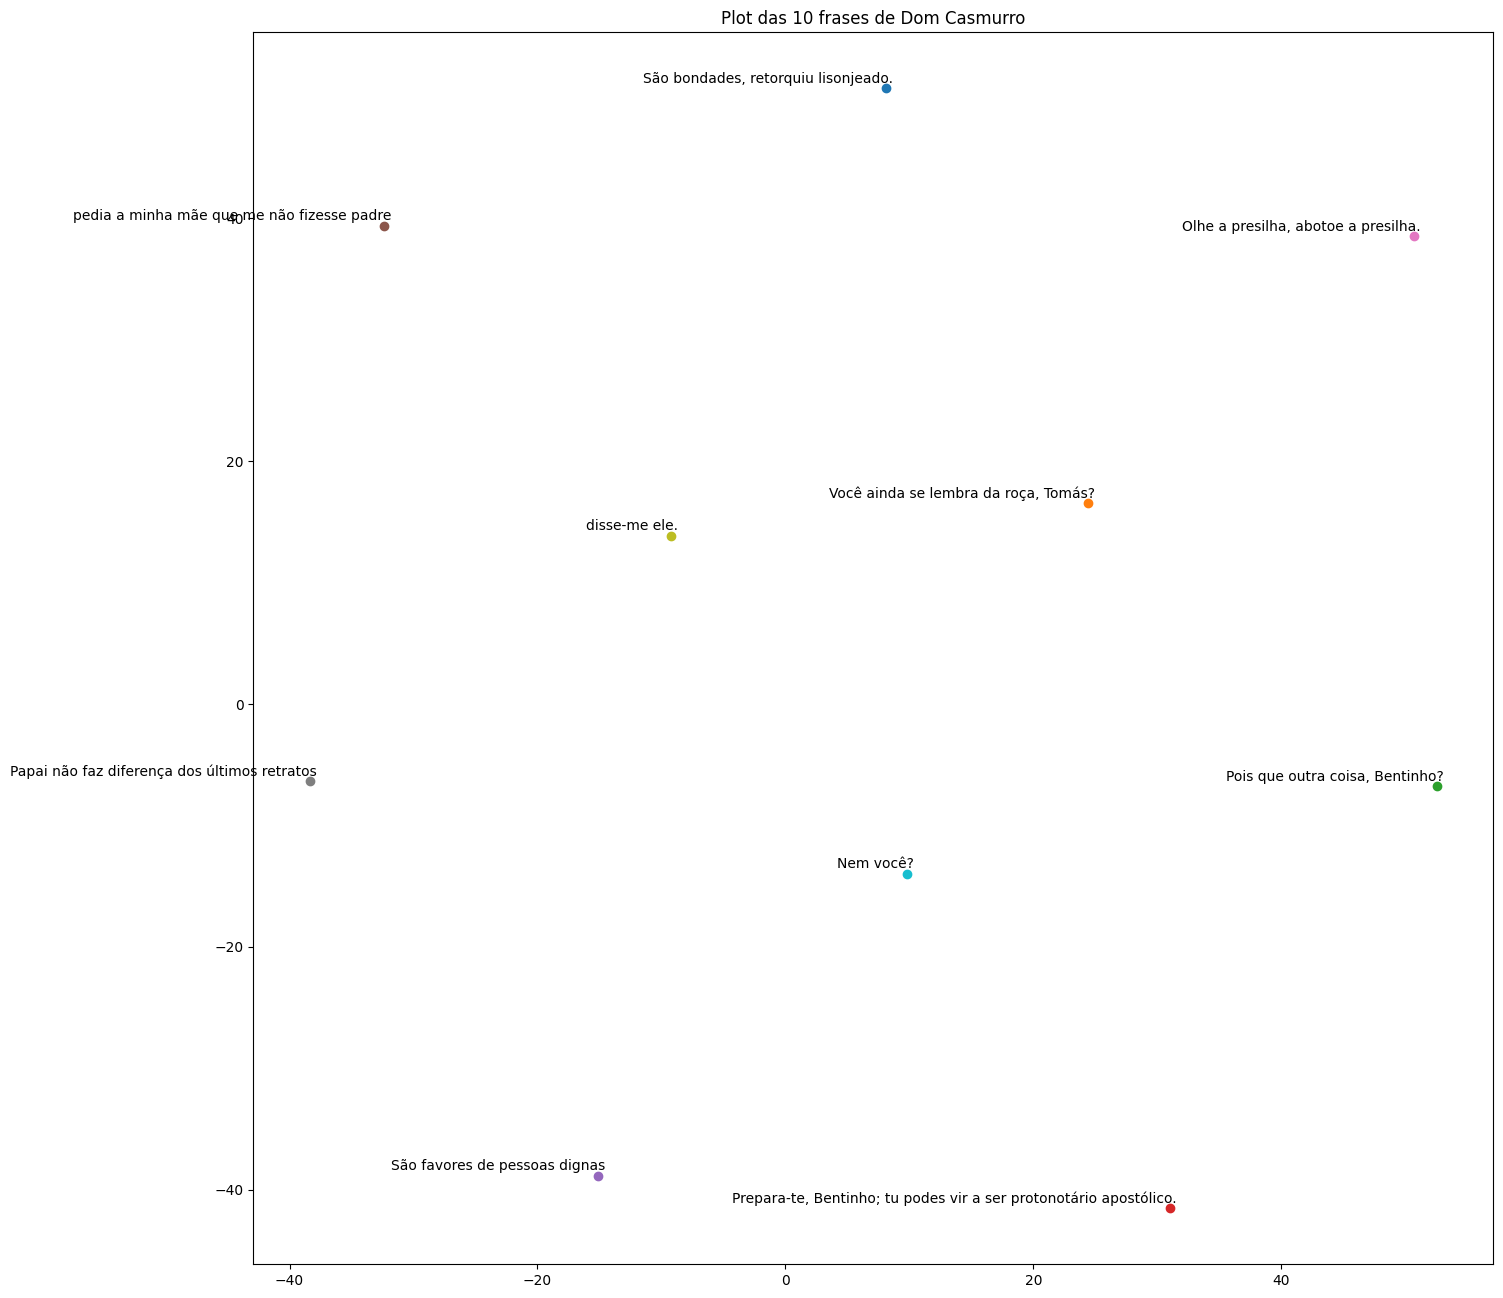

In [20]:
frases_tsne_plot(frases, vetores_frases)